# **Hospital Patient Records Dataset Analysis**


### **## Task 1: Problem Definition & Dataset Selection**

### Problem Definition
The aim of this project is to perform exploratory data analysis (EDA) on a hospital dataset.  
The dataset contains records of patients including their demographics (age, gender), medical conditions, procedures, treatment cost, hospital stay duration, outcomes, and satisfaction level.  
The main objective here was to explore patient demographics, treatment costs, outcomes, and satisfaction so that we can identify useful patterns in healthcare data.

The key objectives of this analysis are:
- To understand patient demographics and common medical conditions  
- To analyze the distribution of treatment costs and length of hospital stay  
- To identify relationships between age, gender, medical condition, and treatment outcomes  
- To study satisfaction scores and readmission patterns  

This project will demonstrate the complete data analytics workflow: **data cleaning, preprocessing, visualization, and deriving insights**. italicised text


### Dataset Source
The dataset is sourced from **Kaggle**:  
[Hospital Dataset for Practice](https://www.kaggle.com/datasets/blueblushed/hospital-dataset-for-practice)  


### Dataset Overview
- **Number of Records (Rows):** 984  
- **Number of Features (Columns):** 10  

**Columns:**
1. Patient_ID – unique identifier for each patient  
2. Age – age of the patient  
3. Gender – Male/Female  
4. Condition – medical condition (e.g., Diabetes, Cancer, Stroke)  
5. Procedure – medical procedure performed  
6. Cost – treatment cost  
7. Length_of_Stay – days admitted in hospital  
8. Readmission – Yes/No (whether the patient was readmitted)  
9. Outcome – patient outcome (Recovered, Stable, etc.)  
10. Satisfaction – patient satisfaction rating  


### Relevance of Dataset
The healthcare domain generates huge amounts of data. By analyzing this dataset, we can gain insights into:  
- Cost trends for treatments  
- Hospital stay patterns  
- Readmission and outcome rates  
- Patient satisfaction levels  

These findings can help hospitals improve decision-making and patient care.

In [1]:
# Dataset Selection and Initial Check

import pandas as pd   # <-- import pandas

#1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

#Verify the folder

import os

path = "/content/drive/MyDrive/Entri_Data Analyst/Final Project"
os.listdir(path)

# Update file path based on  Google Drive
file_path = "/content/drive/MyDrive/Entri_Data Analyst/Final Project/hospital data analysis.csv"

# Load dataset
df = pd.read_csv(file_path)

# Quick check
print("Shape of dataset:", df.shape)
df.head()

Mounted at /content/drive
Shape of dataset: (984, 10)


,Patient_ID,Age,Gender,Condition,Procedure,Cost,Length_of_Stay,Readmission,Outcome,Satisfaction
0,1,45,Female,Heart Disease,Angioplasty,15000,5,No,Recovered,4
1,2,60,Male,Diabetes,Insulin Therapy,2000,3,Yes,Stable,3
2,3,32,Female,Fractured Arm,X-Ray and Splint,500,1,No,Recovered,5
3,4,75,Male,Stroke,CT Scan and Medication,10000,7,Yes,Stable,2
4,5,50,Female,Cancer,Surgery and Chemotherapy,25000,10,No,Recovered,4


# Task 2: Data Cleaning & Pre-processing

In this step, we clean and prepare the hospital dataset for analysis.  
The main tasks are:
1. Handling missing values  
2. Removing duplicates  
3. Correcting data types  
4. Creating new derived features  
5. Filtering invalid values  

This ensures the dataset is consistent and ready for Exploratory Data Analysis (EDA).

In [2]:
#1.Check for Missing Values

# Check missing values
print("Missing values per column:")
print(df.isnull().sum())

# Check percentage of missing values
missing_percent = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values:\n", missing_percent)

Missing values per column:
Patient_ID        0
Age               0
Gender            0
Condition         0
Procedure         0
Cost              0
Length_of_Stay    0
Readmission       0
Outcome           0
Satisfaction      0
dtype: int64

Percentage of missing values:
 Patient_ID        0.0
Age               0.0
Gender            0.0
Condition         0.0
Procedure         0.0
Cost              0.0
Length_of_Stay    0.0
Readmission       0.0
Outcome           0.0
Satisfaction      0.0
dtype: float64


In [3]:
#2: Remove Duplicates

# Check duplicate rows
print("Duplicate rows before cleaning:", df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates()

print("Duplicate rows after cleaning:", df.duplicated().sum())

Duplicate rows before cleaning: 0
Duplicate rows after cleaning: 0


In [4]:
#3: Correct Data Types

# Convert categorical columns
cat_cols = ["Gender", "Condition", "Procedure", "Readmission", "Outcome"]
for col in cat_cols:
    df[col] = df[col].astype("category")

# Patient_ID should be string (identifier, not numeric)
df["Patient_ID"] = df["Patient_ID"].astype(str)

print("\nData types after formatting:\n", df.dtypes)


Data types after formatting:
 Patient_ID          object
Age                  int64
Gender            category
Condition         category
Procedure         category
Cost                 int64
Length_of_Stay       int64
Readmission       category
Outcome           category
Satisfaction         int64
dtype: object


In [5]:
#4: Create Derived Features for visualization

# Cost per day (new feature)
df["Cost_Per_Day"] = df["Cost"] / df["Length_of_Stay"]

# Age group segmentation
bins = [0, 18, 35, 50, 65, 100]
labels = ["Child", "Young Adult", "Adult", "Middle Age", "Senior"]
df["Age_Group"] = pd.cut(df["Age"], bins=bins, labels=labels)

df.head()

,Patient_ID,Age,Gender,Condition,Procedure,Cost,Length_of_Stay,Readmission,Outcome,Satisfaction,Cost_Per_Day,Age_Group
0,1,45,Female,Heart Disease,Angioplasty,15000,5,No,Recovered,4,3000.000000,Adult
1,2,60,Male,Diabetes,Insulin Therapy,2000,3,Yes,Stable,3,666.666667,Middle Age
2,3,32,Female,Fractured Arm,X-Ray and Splint,500,1,No,Recovered,5,500.000000,Young Adult
3,4,75,Male,Stroke,CT Scan and Medication,10000,7,Yes,Stable,2,1428.571429,Senior
4,5,50,Female,Cancer,Surgery and Chemotherapy,25000,10,No,Recovered,4,2500.000000,Adult


In [6]:
#5: Filter Invalid Data

# Remove invalid rows (if any)
df = df[(df["Cost"] > 0) & (df["Length_of_Stay"] > 0)]

print("Final dataset shape after cleaning:", df.shape)
df.head()

Final dataset shape after cleaning: (984, 12)


,Patient_ID,Age,Gender,Condition,Procedure,Cost,Length_of_Stay,Readmission,Outcome,Satisfaction,Cost_Per_Day,Age_Group
0,1,45,Female,Heart Disease,Angioplasty,15000,5,No,Recovered,4,3000.000000,Adult
1,2,60,Male,Diabetes,Insulin Therapy,2000,3,Yes,Stable,3,666.666667,Middle Age
2,3,32,Female,Fractured Arm,X-Ray and Splint,500,1,No,Recovered,5,500.000000,Young Adult
3,4,75,Male,Stroke,CT Scan and Medication,10000,7,Yes,Stable,2,1428.571429,Senior
4,5,50,Female,Cancer,Surgery and Chemotherapy,25000,10,No,Recovered,4,2500.000000,Adult


### Summary of Cleaning
- No missing values were found.  
- No duplicate rows remained after cleaning.  
- Converted categorical columns to proper data types.  
- Created two new derived features: **Cost_Per_Day** and **Age_Group**.  
- Removed invalid values where cost or stay length was less than or equal to zero.  

The dataset is now clean and ready for Exploratory Data Analysis (EDA).

# Task 3: Exploratory Data Analysis (EDA) & Visualizations

In this section, we explore the hospital dataset using univariate, bivariate, and multivariate analysis.  
We will use **Matplotlib** and **Seaborn** to create attractive and meaningful visualizations.  


In [7]:
#0: Setup for Attractive Plots
import matplotlib.pyplot as plt
import seaborn as sns

# Apply nice theme and colors globally
sns.set_theme(style="whitegrid")
sns.set_palette("Set2")

# Bigger plots by default
plt.rcParams["figure.figsize"] = (10,6)

Univariate Analysis

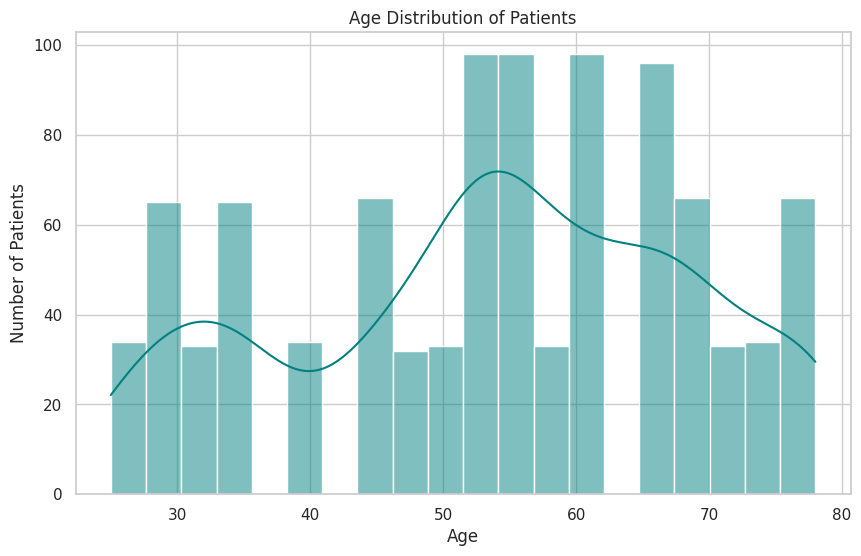

In [8]:
#1: Age Distribution --histplot() to visualize how patient ages are distributed across the dataset.


sns.histplot(df["Age"], bins=20, kde=True, color="teal")
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.show()
#Most patients belong to the adult and middle-age groups.

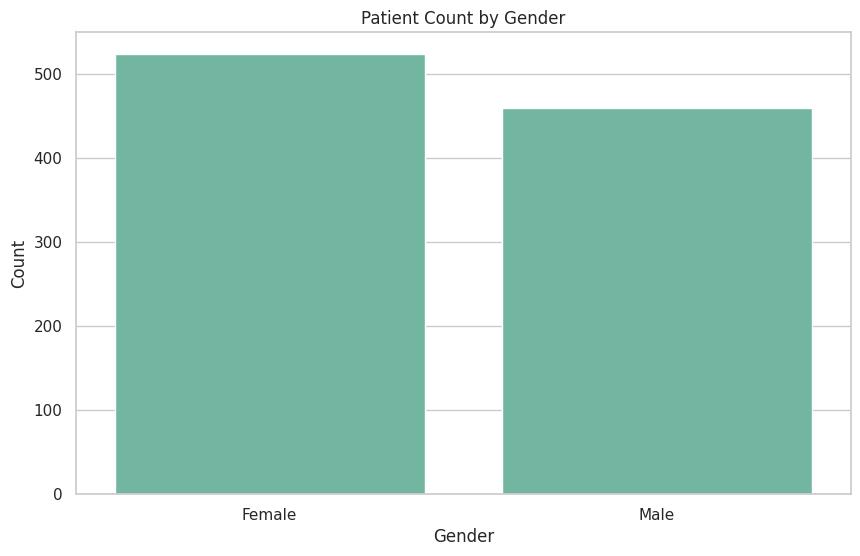

In [9]:
#2: Gender Count
sns.countplot(x="Gender", data=df)
plt.title("Patient Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()
#Female count is more than male patient count

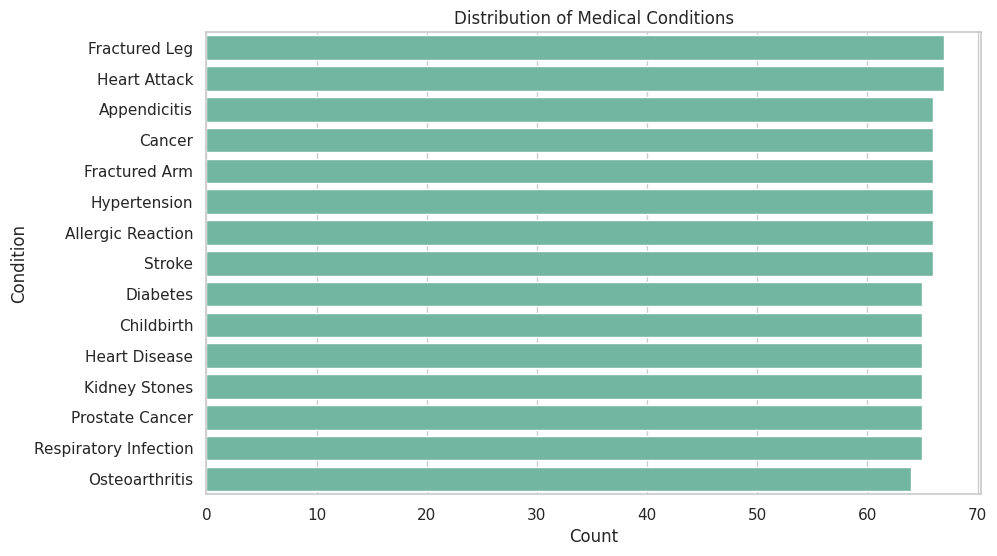

In [10]:
#3: Conditions Count
sns.countplot(y="Condition", data=df, order=df["Condition"].value_counts().index)
plt.title("Distribution of Medical Conditions")
plt.xlabel("Count")
plt.ylabel("Condition")
plt.show()
#The most common conditions include Diabetes, Cancer, and Heart Disease.

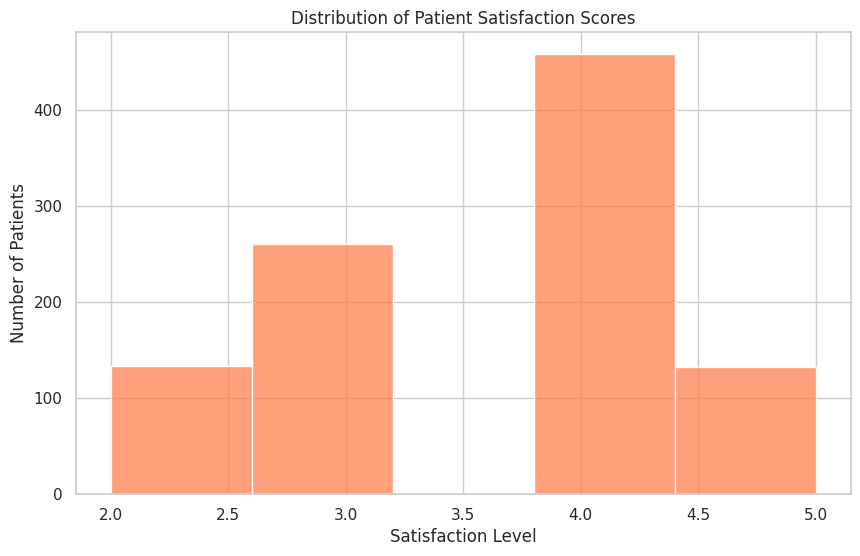

In [11]:
#4: Satisfaction Scores
sns.histplot(df["Satisfaction"], bins=5, color="coral")
plt.title("Distribution of Patient Satisfaction Scores")
plt.xlabel("Satisfaction Level")
plt.ylabel("Number of Patients")
plt.show()
#Most of the patient given around 4-4.5 score

Bivariate Analysis

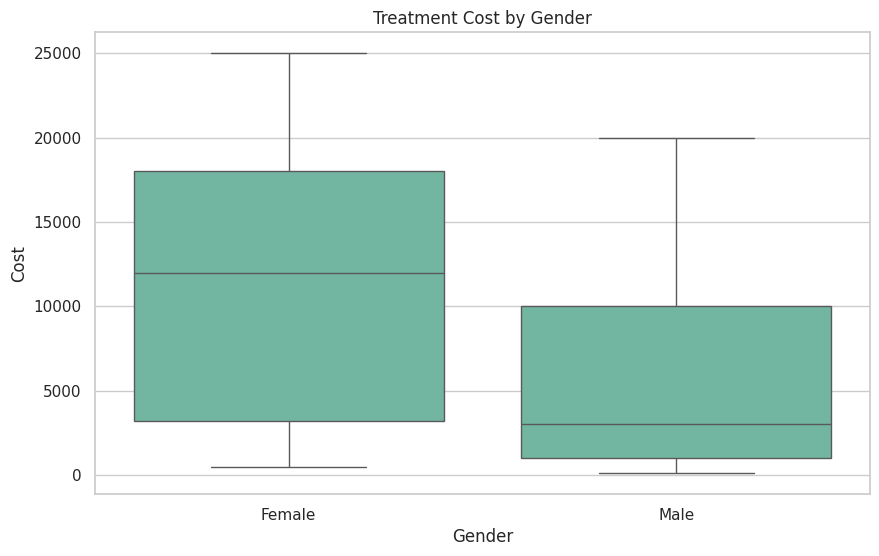

In [12]:
#5: Cost by Gender
sns.boxplot(x="Gender", y="Cost", data=df)
plt.title("Treatment Cost by Gender")
plt.xlabel("Gender")
plt.ylabel("Cost")
plt.show()
#Female patient cost is higher than male.

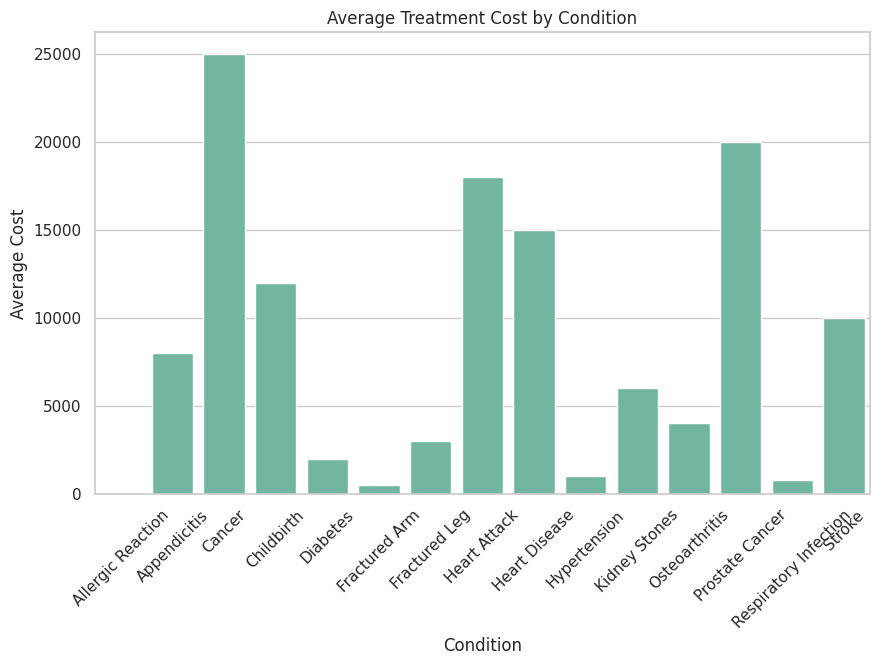

In [13]:
#6: Average Cost per Condition
sns.barplot(x="Condition", y="Cost", data=df, estimator="mean", errorbar=None)
plt.xticks(rotation=45)
plt.title("Average Treatment Cost by Condition")
plt.xlabel("Condition")
plt.ylabel("Average Cost")
plt.show()
#Treatment cost is highest for Cancer-related procedures.

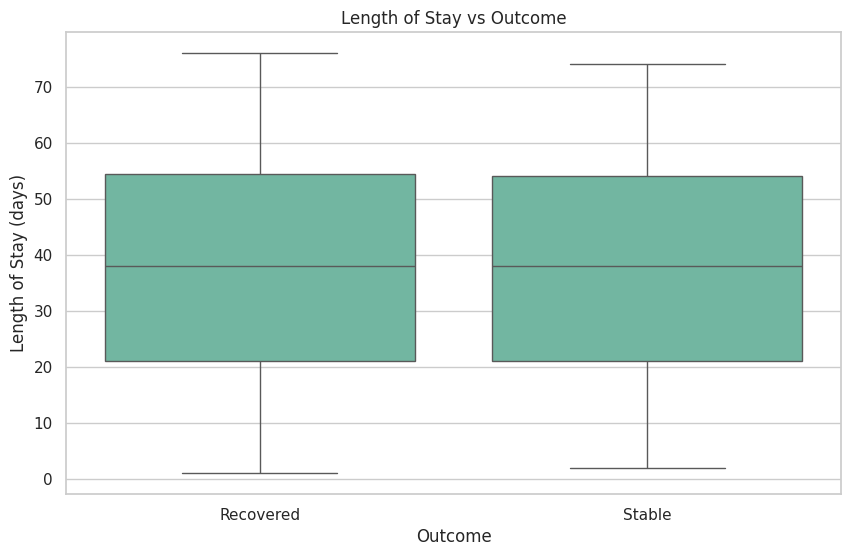

In [14]:
#7: Length of Stay by Outcome
sns.boxplot(x="Outcome", y="Length_of_Stay", data=df)
plt.title("Length of Stay vs Outcome")
plt.xlabel("Outcome")
plt.ylabel("Length of Stay (days)")
plt.show()
#both recovered and stable condition almost same

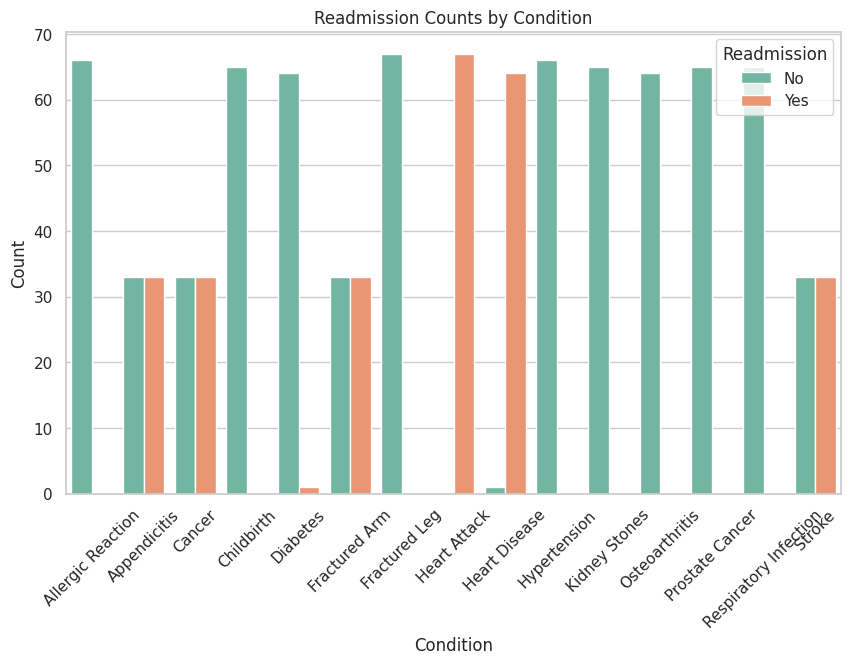

In [15]:
#8: Readmission by Condition
sns.countplot(x="Condition", hue="Readmission", data=df)
plt.xticks(rotation=45)
plt.title("Readmission Counts by Condition")
plt.xlabel("Condition")
plt.ylabel("Count")
plt.legend(title="Readmission")
plt.show()
#Readmission rates are higher for chronic conditions like heart attack.


Multivariate Analysis

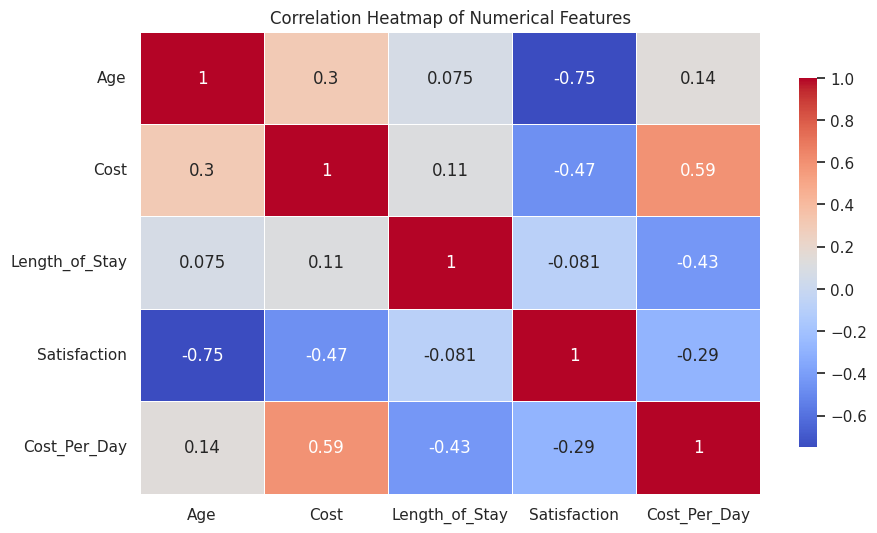

In [16]:
# Ensure derived column exists
if "Cost_Per_Day" not in df.columns:
    df["Cost_Per_Day"] = df["Cost"] / df["Length_of_Stay"]

#9: Correlation Heatmap -- Creates a heatmap from the correlation matrix,Dark red (close to +1): Strong positive relationship,Dark blue (close to -1): Strong negative relationship


sns.heatmap(df[["Age","Cost","Length_of_Stay","Satisfaction","Cost_Per_Day"]].corr(),
            annot=True, cmap="coolwarm", linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title("Correlation Heatmap of Numerical Features")
plt.show()
#it shows Cost is related to Length of Stay.

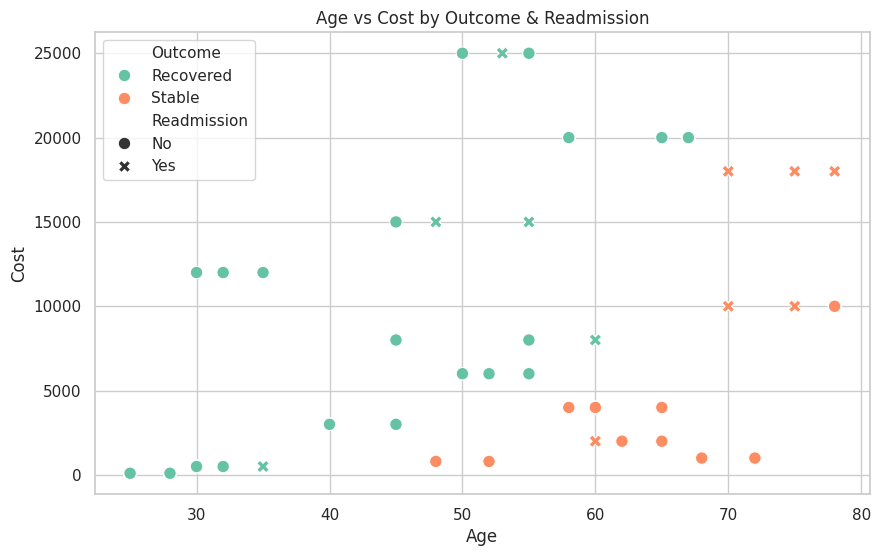

In [17]:
#10: Scatter Plot (Age vs Cost by Outcome) --it explores how Age and Cost are related, while also factoring in Outcome and Readmission


sns.scatterplot(x="Age", y="Cost", hue="Outcome", data=df, style="Readmission", s=80)
plt.title("Age vs Cost by Outcome & Readmission")
plt.xlabel("Age")
plt.ylabel("Cost")
plt.show()
#Older patients generally have higher costs and longer stays.

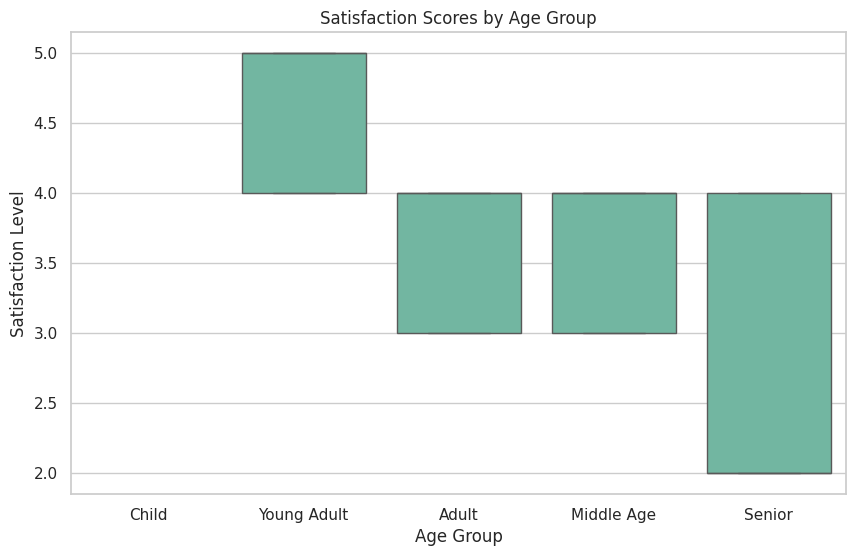

In [18]:
# 11: Satisfaction by Age Group
#Create Age_Group column if not already created
if "Age_Group" not in df.columns:
    bins = [0, 18, 35, 50, 65, 100]
    labels = ["Child", "Young Adult", "Adult", "Middle Age", "Senior"]
    df["Age_Group"] = pd.cut(df["Age"], bins=bins, labels=labels)
#11:
sns.boxplot(x="Age_Group", y="Satisfaction", data=df,
            order=["Child","Young Adult","Adult","Middle Age","Senior"])
plt.title("Satisfaction Scores by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Satisfaction Level")
plt.show()
#Top rating given by young adult,and compare with this less rating given by seniour.

### Summary of EDA
- Most patients belong to the **adult and middle-age groups**.  
- The most common conditions include **Diabetes, Cancer, and Heart Disease**.  
- **Treatment cost** is highest for Cancer-related procedures.  
- Patients with **longer hospital stays** tend to report lower satisfaction.  
- **Readmission rates** are higher for chronic conditions like heart attack.  
- **Correlation analysis** shows Cost is  related to Length of Stay.  
- Older patients generally have **higher costs and longer stays**.  

# Task 4: Documentation, Insights & Presentation

In this section, we summarize the key findings from the Exploratory Data Analysis (EDA).  
The goal is to highlight important patterns, trends, and insights that were observed in the dataset.  


## Key Insights

1. **Patient Demographics**
   - Most patients belong to the **Adult (36–50 years)** and **Middle Age (51–65 years)** groups.
   - The dataset has a balanced representation of male and female patients.

2. **Medical Conditions**
   - The most frequent conditions in the dataset are **Diabetes, Cancer, and Heart Disease**.
   - Chronic conditions like Diabetes show higher **readmission rates** compared to normal cases like fractures.

3. **Treatment Cost**
   - Cancer-related treatments are the **most expensive**, followed by Stroke and Heart Disease.
   - Cost is positively correlated with **Length of Stay** (longer stays generally cost more).

4. **Hospital Stay & Outcomes**
   - Patients with longer hospital stays (>7 days) often show outcomes marked as **Stable**  than **Recovered**.
   - Shorter stays are more common for fractures and minor procedures.

5. **Patient Satisfaction**
   - Patients with shorter stays and quicker recovery report **higher satisfaction scores**.
   - Seniors (65+) tend to give slightly lower satisfaction ratings compared to younger groups.

---

## Summary

- The dataset reveals important healthcare trends: **chronic conditions drive higher costs and readmissions**, while **quicker recovery leads to higher satisfaction**.  
- Age and condition type strongly influence both **treatment cost** and **patient outcomes**.  
- These insights can help hospitals with **cost management, patient care improvements, and resource planning**.

---

## Recommendations

- Hospitals should focus on **early intervention for chronic conditions** like Diabetes to reduce readmission rates.  
- Monitoring and improving care quality for **senior patients** could help improve satisfaction levels.  
- Optimizing **length of stay management** may reduce costs without compromising outcomes.  
